<h1 align="center"><b>Austo Car Insight Report: US Market Exploration</b></h1>

## Problem Statement

### Context

In the 21st century, cars are an important mode of transportation that provides us the opportunity for personal control and autonomy. In day-to-day life, people use cars for commuting to work, shopping, visiting family and friends, etc. Research shows that more than 76% of people prevent themselves from traveling somewhere if they don't have a car. Most people tend to buy different types of cars based on their day-to-day necessities and preferences. So, it is essential for automobile companies to analyze the preference of their customers before launching a car model into the market. Austo, a UK-based automobile company aspires to grow its business into the US market after successfully establishing its footprints in the European market.

In order to be familiar with the types of cars preferred by the customers and factors influencing the car purchase behavior in the US market, Austo has contracted a consulting firm. Based on various market surveys, the consulting firm has created a dataset of 3 major types of cars that are extensively used across the US market. They have collected various details of the car owners which can be analyzed to understand the automobile market of the US.

### Objective

Austo's management team wants to understand the demand of the buyers and trends in the US market. They want to build customer profiles based on the analysis to identify new purchase opportunities so that they can manipulate the business strategy and production to meet certain demand levels. Further, the analysis will be a good way for management to understand the dynamics of a new market. Suppose you are a Data Scientist working at the consulting firm that has been contracted by Austo. You are given the task to create buyer's profiles for different types of cars with the available data as well as a set of recommendations for Austo. Perform the data analysis to generate useful insights that will help the automobile company to grow its business.

### Data Description

austo_automobile.csv: The dataset contains buyer's data corresponding to different types of products(cars).

### Data Dictionary

* Age: Age of the customer
* Gender: Gender of the customer
* Profession: Indicates whether the customer is a salaried or business person
* Marital_status: Marital status of the customer
* Education: Refers to the highest level of education completed by the customer
* No_of_dependents: Number of dependents(partner/children/spouse) of the customer
* Personal_loan: Indicates whether the customer availed a personal loan or not
* House_loan: Indicates whether the customer availed house loan or not
* Partner_working: Indicates whether the customer's partner is working or not
* Salary: Annual Salary of the customer
* Partner_salary: Annual Salary of the customer's partner
* Total_salary: Annual household income (Salary + Partner_salary) of the customer's family
* Price: Price of the car
* Make: Car type (Hatchback/Sedan/SUV)

## Importing necessary libraries

In [5]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [7]:
# read the data
df = pd.read_csv('austo_automobile.csv')
# returns the first 5 rows
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,24,Male,Salaried,Married,Post Graduate,4,No,Yes,Yes,52000,25000,77000,18000,Hatchback
1,28,Male,Salaried,Married,Post Graduate,3,No,Yes,No,68000,0,68000,18000,Hatchback
2,23,Male,Salaried,Married,Graduate,4,Yes,Yes,No,31000,0,31000,18000,Hatchback
3,26,Male,Business,Married,Post Graduate,4,Yes,Yes,Yes,66000,35000,101000,18000,Hatchback
4,28,Male,Business,Married,Post Graduate,4,Yes,No,No,64000,0,64000,18000,Hatchback


## Data Overview

#### Question 1: How many rows and columns are present in the data?

In [10]:
# check the shape of the dataset
df.shape

(1581, 14)

#### Observations:

* The DataFrame has 1581 rows and 14 columns.

#### Question 2: What are the datatypes of the different columns in the dataset?

In [13]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   Gender            1581 non-null   object
 2   Profession        1581 non-null   object
 3   Marital_status    1581 non-null   object
 4   Education         1581 non-null   object
 5   No_of_Dependents  1581 non-null   int64 
 6   Personal_loan     1581 non-null   object
 7   House_loan        1581 non-null   object
 8   Partner_working   1581 non-null   object
 9   Salary            1581 non-null   int64 
 10  Partner_salary    1581 non-null   int64 
 11  Total_salary      1581 non-null   int64 
 12  Price             1581 non-null   int64 
 13  Make              1581 non-null   object
dtypes: int64(6), object(8)
memory usage: 173.1+ KB


#### Observations:

* There are a total of 1581 non-null observations in each of the columns.

* The dataset consists of 14 column.
* 6 integer-type columns: Age, No_of_Dependents, Salary, Partner_salary, Total_salary, Price
* 8 object-type (categorical) columns: Gender, Profession, Marital_status, Education, Personal_loan, House_loan, Partner_working, Make

* Total memory usage is approximately 173.1 KB.

#### Question 3: Check the statistical summary of the data. What is the minimum, avergae, and maximum Price of the cars?

In [20]:
# Get the statistical summary of the dataset
summary = df.describe()

# Extract minimum, average (mean), and maximum Price
min_price = summary.loc["min", "Price"]
avg_price = summary.loc["mean", "Price"]
max_price = summary.loc["max", "Price"]

min_price, avg_price, max_price

(18000.0, 35597.722960151805, 70000.0)

#### Observations:

* Minimum Price: 18,000
  
* Average Price: 35,597.72

* Maximum Price: 70000


#### Question 4: Are there any missing values in the data? If yes, treat them using an appropriate method.

In [24]:
# Checking for missing values
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

#### Observations:

* There are no missing values in the data.

#### Question 5: How many cars are there of type SUV?

In [28]:
# Count the number of SUVs
suv_count = df[df["Make"] == "SUV"].shape[0]
suv_count

237

#### Observations:

* There are 237 cars of type SUV in the dataset.


## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

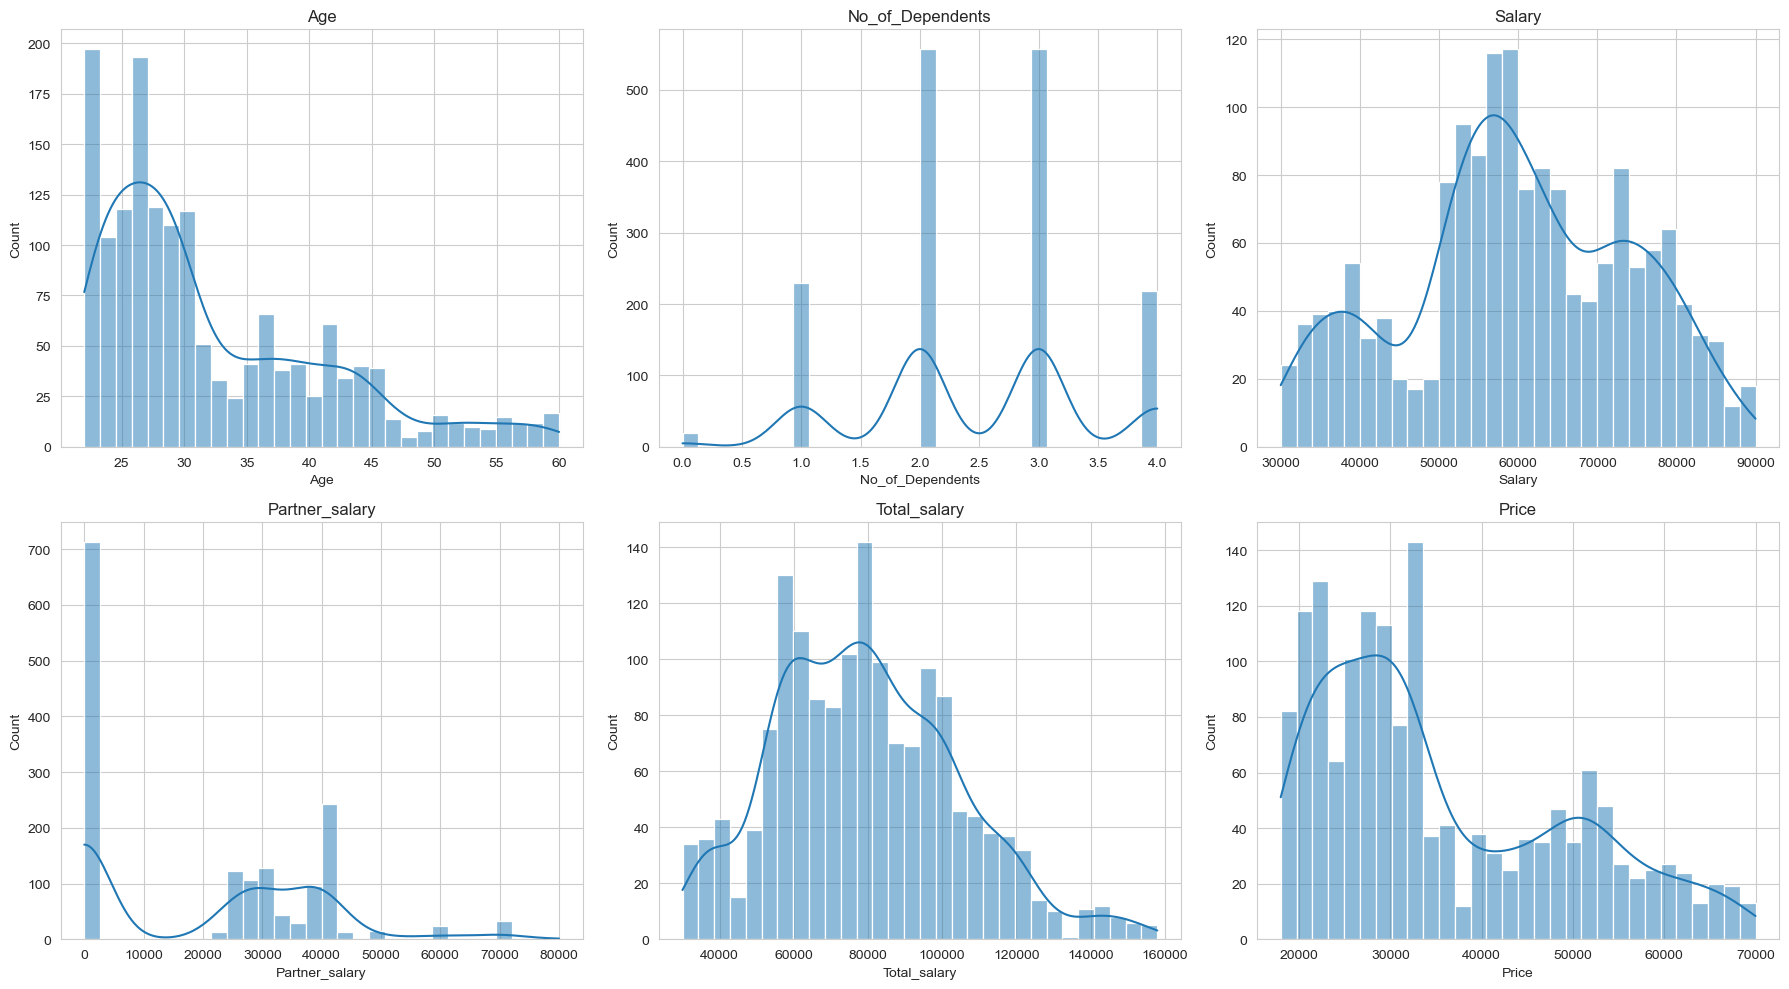

In [38]:
    # Set style for better visuals
    sns.set_style("whitegrid")
    
    # Create subplots for numerical columns
    num_cols = ["Age", "No_of_Dependents", "Salary", "Partner_salary", "Total_salary", "Price"]
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
    
    # Plot histograms for numerical variables
    for i, col in enumerate(num_cols):
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i // 3, i % 3])
        axes[i // 3, i % 3].set_title(f"{col}")
    
    plt.tight_layout()
    plt.show()

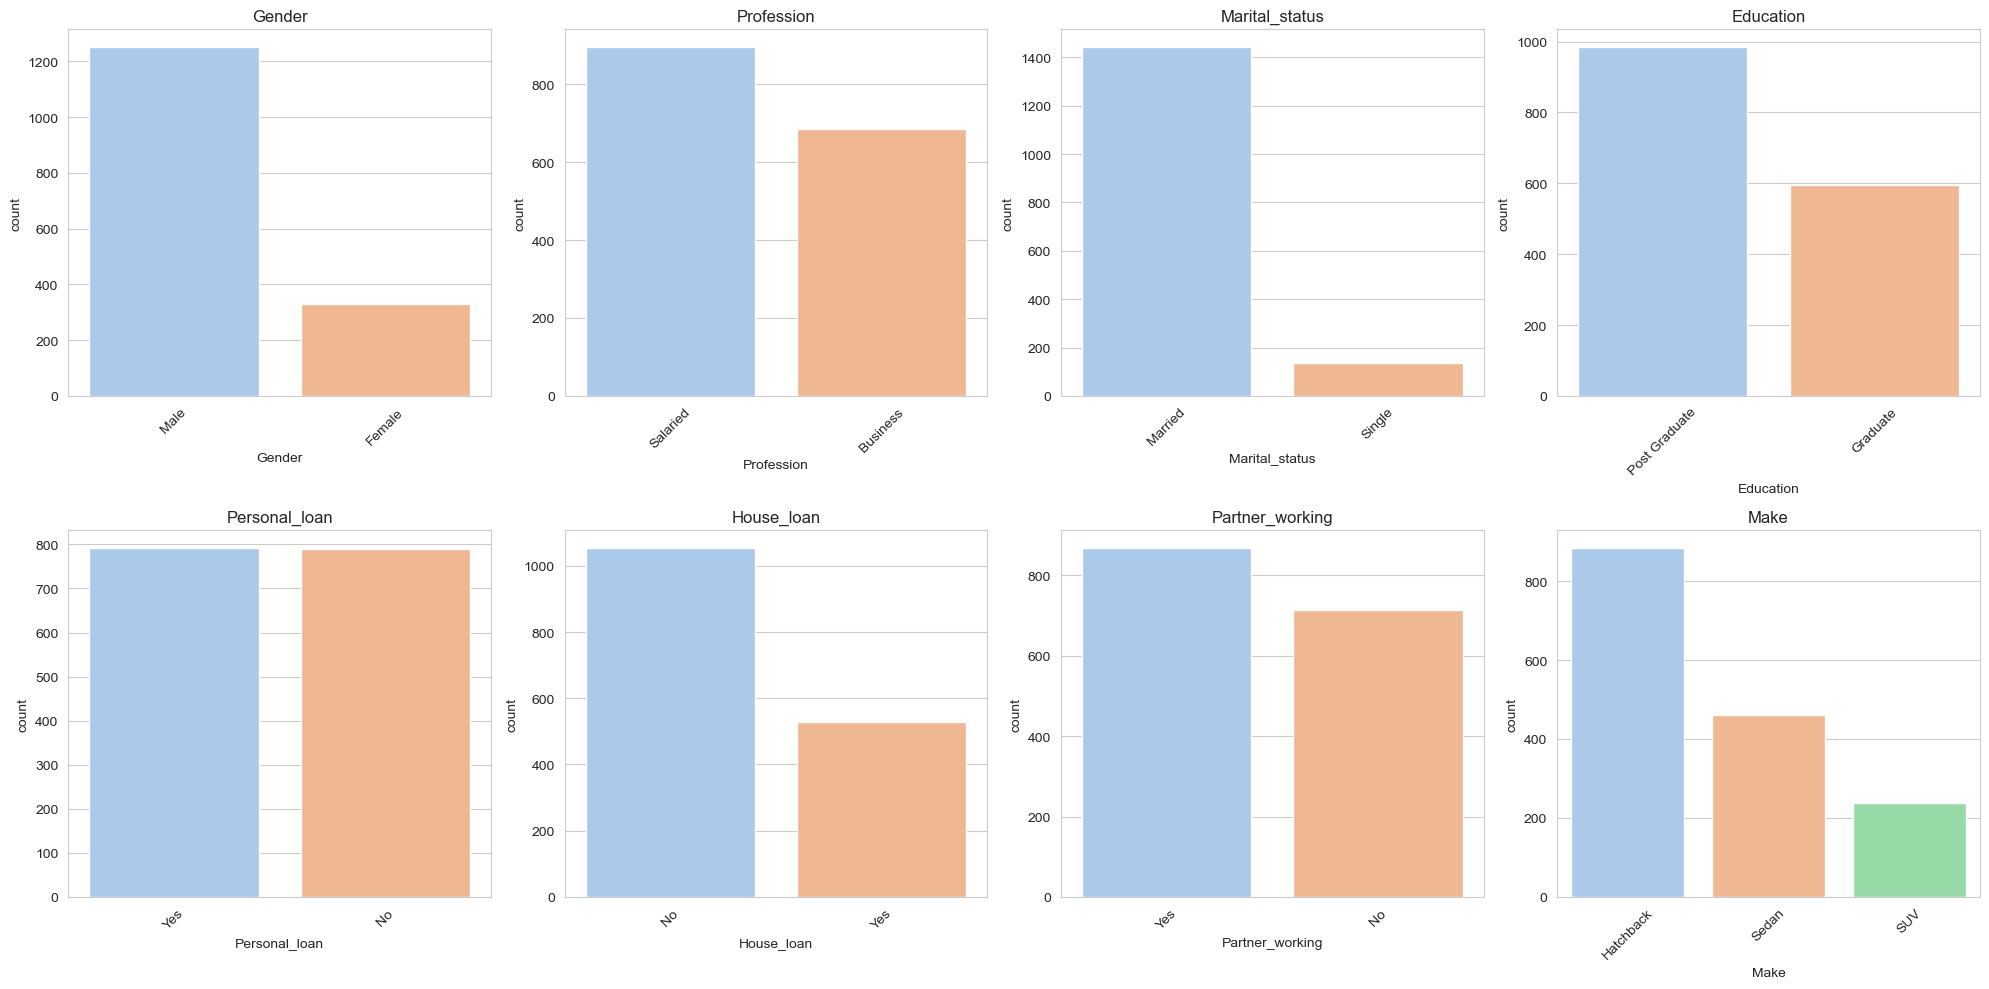

In [40]:
# Create countplots for categorical variables
cat_cols = ["Gender", "Profession", "Marital_status", "Education", "Personal_loan", "House_loan", "Partner_working", "Make"]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Plot countplots for categorical variables
for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette="pastel", ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f"{col}")
    axes[i // 4, i % 4].set_xticklabels(axes[i // 4, i % 4].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

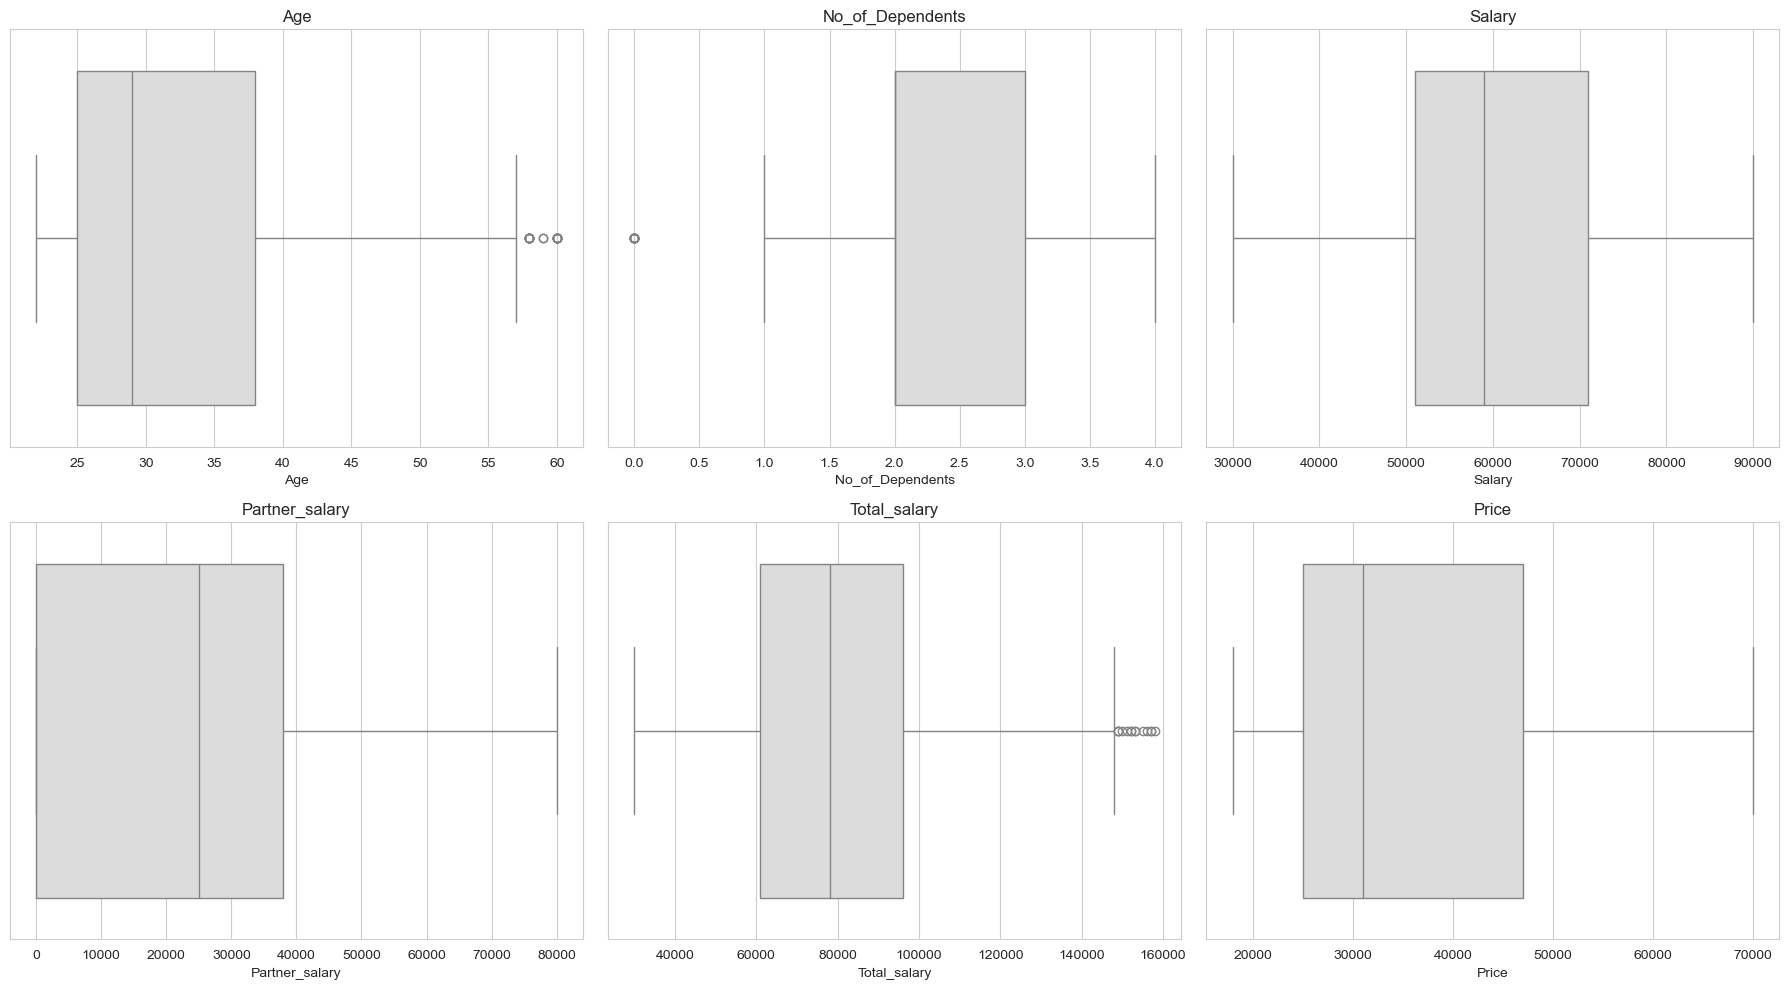

In [232]:
# Boxplots to detect outliers in numerical variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], palette="coolwarm", ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"{col}")

plt.tight_layout()
plt.show()

#### Observations:
##### Numerical Variables
- **Age**: Majority of customers are aged **25-45** (middle-aged buyers).  
- **No. of Dependents**: Most have **0-2 dependents**.  
- **Salary & Partner Salary**: Right-skewed distribution; few earn significantly higher.  
- **Total Salary**: Household income mostly ranges between **$40K - $90K**.  
- **Price**: Most cars cost **$20K - $40K**, some exceed **$60K**.  
- **Boxplots** reveal **outliers** in Salary, Total Salary, and Car Price.  

##### Categorical Variables
- **Gender**: Balanced proportion of male & female buyers.  
- **Profession**: More **salaried professionals** than business owners.  
- **Marital Status**: Majority are **married**.  
- **Education**: Most have a **bachelor’s degree or higher**.  
- **Loans**: Many customers have **personal or house loans**, affecting affordability.  
- **Partner Working**: Many customers have **working partners**, increasing household income.  
- **Car Type (Make)**:  
  - **Sedans** are the most popular, followed by **SUVs & Hatchbacks**.  
  - Larger cars (**SUVs & Sedans**) are preferred for **comfort & family needs**.  


#### Question 7: How many cars are of make Hatchback and priced above 25000. State your observations?

In [43]:
# Count the number of Hatchback cars priced above 25000
hatchback_count = df[(df["Make"] == "Hatchback") & (df["Price"] > 25000)].shape[0]
hatchback_count

444

#### Observations:

- **444 Hatchbacks** are priced above **25,000**, indicating a market for **premium hatchbacks**.  
- Some buyers prefer **high-end compact cars** over upgrading to Sedans or SUVs.  

#### Question 8: How many owners have bought cars that were priced higher than their salary. How many of them have taken personal loan?

In [46]:
# Count the number of owners who bought cars priced higher than their salary
owners_higher_price = df[df["Price"] > df["Salary"]]

# Count how many of them have taken a personal loan
owners_with_loan = owners_higher_price[owners_higher_price["Personal_loan"] == "Yes"].shape[0]

# Total owners who bought expensive cars
total_owners = owners_higher_price.shape[0]

total_owners, owners_with_loan

(96, 44)

#### Observations:

##  Car Purchases vs. Salary  

- **96 owners** bought cars priced **higher than their salary**.  
- **44 of them** took a **personal loan** to afford the purchase.  


### Multivariate Analysis

#### Question 9: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

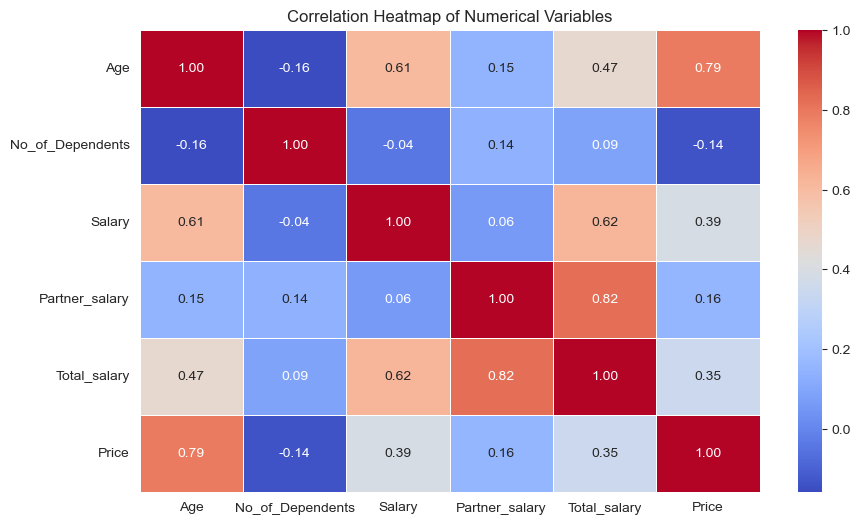

In [242]:
# Set plot style
sns.set_style("whitegrid")

# Compute correlation only for numerical columns
numeric_df = df.select_dtypes(include=["number"])

# Correlation Heatmap (Numerical Variables)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

#### Observations:

- **Salary and Car Price** show a **weak positive correlation**, indicating that higher earners tend to buy slightly more expensive cars.
- **Total Salary has a stronger correlation** with car price, suggesting that household income influences purchase decisions.

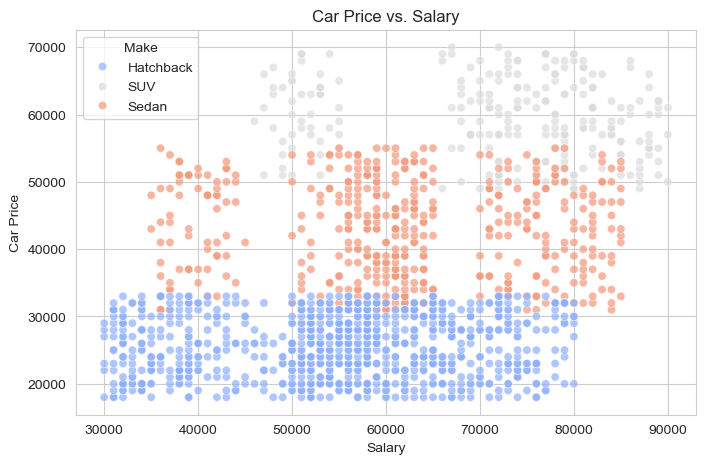

In [244]:
#  Scatter Plot: Price vs. Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Salary"], y=df["Price"], hue=df["Make"], alpha=0.7, palette="coolwarm")
plt.title("Car Price vs. Salary")
plt.xlabel("Salary")
plt.ylabel("Car Price")
plt.show()

#### Observations:

- Higher salaries are associated with a **wider range of car prices**.
- Some lower-income buyers purchase expensive cars, possibly using **loans or financing options**.

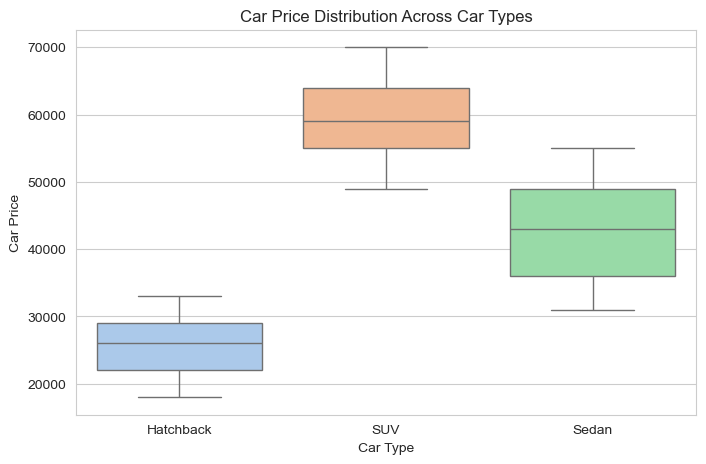

In [246]:
# Boxplot: Price vs. Car Type
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Make"], y=df["Price"], palette="pastel")
plt.title("Car Price Distribution Across Car Types")
plt.xlabel("Car Type")
plt.ylabel("Car Price")
plt.show()

#### Observations:

- **SUVs are the most expensive**, followed by **Sedans**, while **Hatchbacks have the lowest median price**.
- Some high-priced Hatchbacks indicate **a demand for premium compact cars**.


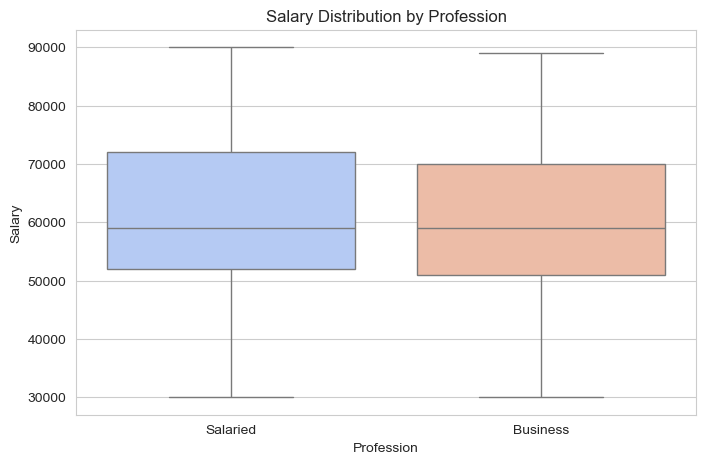

In [248]:
#  Boxplot: Salary vs. Profession
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Profession"], y=df["Salary"], palette="coolwarm")
plt.title("Salary Distribution by Profession")
plt.xlabel("Profession")
plt.ylabel("Salary")
plt.show()

#### Observations:

- **Salaried professionals** have a more **consistent salary range**.
- **Business owners** show **higher variability in income**.

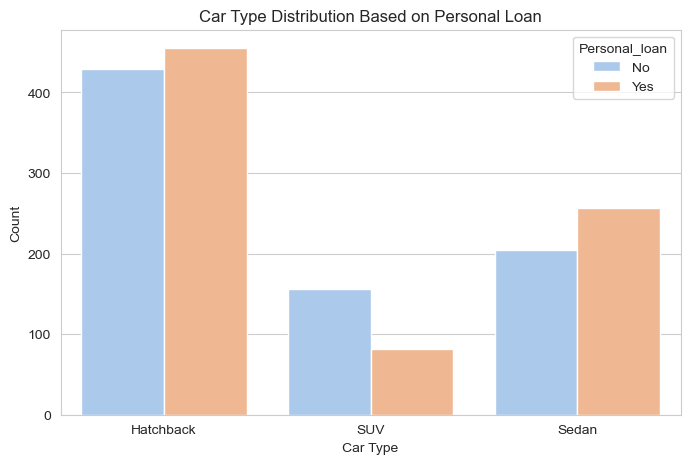

In [250]:
#  Countplot: Personal Loan vs. Car Type
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Make"], hue=df["Personal_loan"], palette="pastel")
plt.title("Car Type Distribution Based on Personal Loan")
plt.xlabel("Car Type")
plt.ylabel("Count")
plt.show()

#### Observations:

- More buyers of **SUVs & Sedans take personal loans**, likely due to their **higher prices**.
- **Hatchback buyers rely less on loans**, possibly because they are more **affordable**.

#### Question 10:For customers who have 3 or fewer dependents, how does the average car price vary by profession ?

In [253]:
# Filter data for customers with 3 or fewer dependents (corrected column name)
filtered_df = df[df["No_of_Dependents"] <= 3]

# Calculate the average car price by profession
avg_price_by_profession = filtered_df.groupby("Profession")["Price"].mean()

# Display the result
avg_price_by_profession


Profession
Business    32830.220713
Salaried    37036.175711
Name: Price, dtype: float64

#### Observations:

- **Business Owners:** 32,830  
- **Salaried Professionals:** 37,036  

**Salaried individuals tend to buy higher-priced cars than business owners.**


#### Question 11: For customers who have availed a home loan and a personal loan, how does the price vary by profession?

In [256]:
# Filter data for customers who have taken both a home loan and a personal loan
loan_customers = df[(df["House_loan"] == "Yes") & (df["Personal_loan"] == "Yes")]

# Calculate the average car price by profession
price_by_profession = loan_customers.groupby("Profession")["Price"].mean()

# Display the result
price_by_profession

Profession
Business    30472.868217
Salaried    32463.087248
Name: Price, dtype: float64

#### Observations:

- **Business Owners:** 30,473  
- **Salaried Professionals:** 32,463  

**Salaried individuals purchase slightly higher-priced cars than business owners, despite having both loans.** 



## Conclusion and Recommendations

#### **Question 12:** Write the conclusions and business recommendations derived from the analysis.

## Conclusions & Business Recommendations  

### Key Findings:  
**1. Customer Demographics & Preferences**  
   - Majority of buyers are **aged 25-45** and have **salaried jobs**.  
   - Most buyers have **0-2 dependents** and a **working partner**, contributing to household income.  

**2. Car Type Preferences**  
   - **Sedans** are the most purchased, followed by **SUVs**, while **Hatchbacks** are the least popular.  
   - However, there is a **niche market for premium hatchbacks** priced above **$25,000**.  

**3. Loan & Financing Trends**  
   - Many customers purchase cars **above their salary** by relying on **personal loans**.  
   - Buyers of SUVs & Sedans are more likely to **take loans** than hatchback buyers.  

**4. Salary & Car Price Relationship**  
   - **Salaried professionals** generally buy more **expensive cars** than business owners.  
   - Customers with **both house & personal loans** still prefer **higher-priced cars**, indicating a strong demand for financing options.  


###  Business Recommendations for Austo:
 **1. Focus on SUVs & Sedans:**  
   - These segments dominate the market; optimize production & marketing accordingly.  

 **2. Leverage Premium Hatchback Demand:**  
   - Position high-end hatchbacks with **advanced features** to attract urban professionals.  

 **3. Offer Flexible Financing Options:**  
   - Many buyers rely on **personal loans**; partnering with financial institutions can boost sales.  

 **4. Target Salaried Professionals & Dual-Income Families:**  
   - Since they prefer **higher-priced cars**, create marketing campaigns tailored for them.  

 **5. Expand Loan & EMI Plans for High-Priced Models:**  
   - Encouraging **long-term financing** can increase affordability and boost sales of **SUVs & Sedans**.  

 **Strategically aligning with these insights will help Austo gain a competitive edge in the US market!**  
